Seed 1/30
Seed 2/30
Seed 3/30
Seed 4/30
Seed 5/30
Seed 6/30
Seed 7/30
Seed 8/30
Seed 9/30
Seed 10/30
Seed 11/30
Seed 12/30
Seed 13/30
Seed 14/30
Seed 15/30
Seed 16/30
Seed 17/30
Seed 18/30
Seed 19/30
Seed 20/30
Seed 21/30
Seed 22/30
Seed 23/30
Seed 24/30
Seed 25/30
Seed 26/30
Seed 27/30
Seed 28/30
Seed 29/30
Seed 30/30


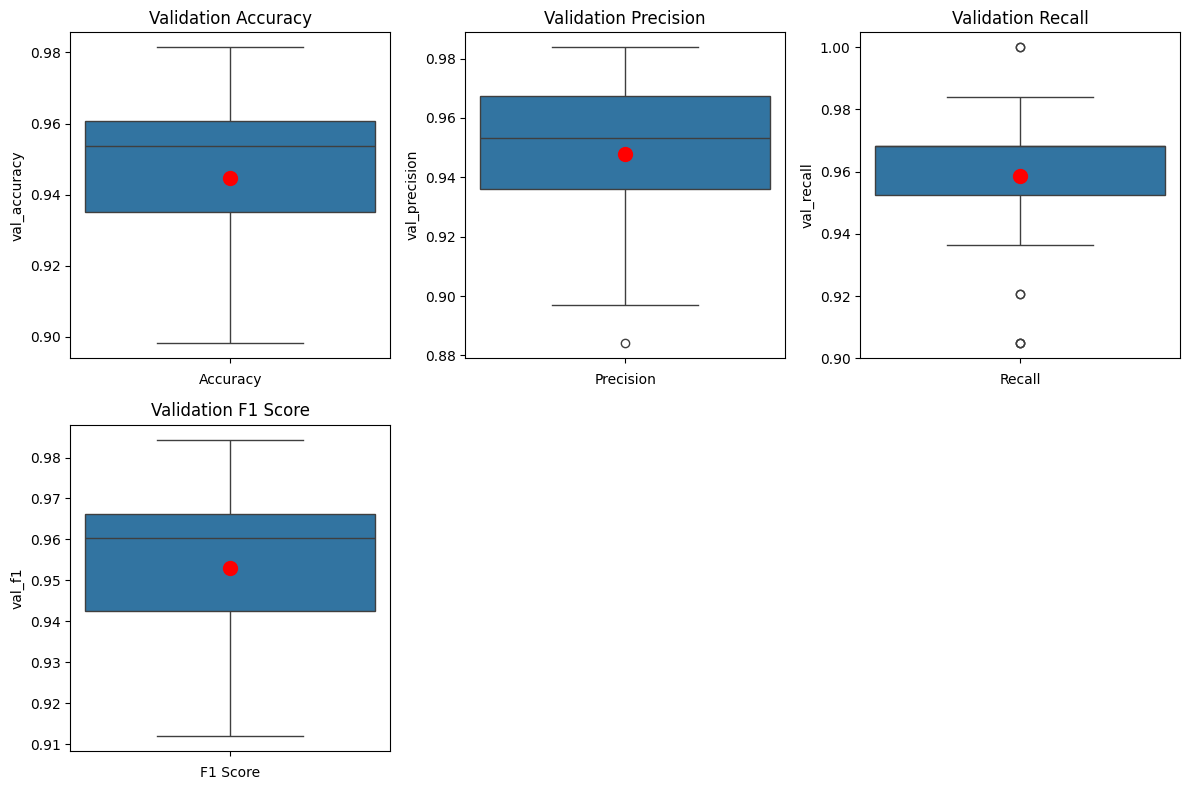

Confusion Matrix for Seed 1:
[[43  2]
 [ 2 61]]

Confusion Matrix for Seed 2:
[[42  3]
 [ 1 62]]

Confusion Matrix for Seed 3:
[[42  3]
 [ 2 61]]

Confusion Matrix for Seed 4:
[[41  4]
 [ 2 61]]

Confusion Matrix for Seed 5:
[[37  8]
 [ 2 61]]

Confusion Matrix for Seed 6:
[[44  1]
 [ 6 57]]

Confusion Matrix for Seed 7:
[[41  4]
 [ 1 62]]

Confusion Matrix for Seed 8:
[[40  5]
 [ 6 57]]

Confusion Matrix for Seed 9:
[[43  2]
 [ 2 61]]

Confusion Matrix for Seed 10:
[[42  3]
 [ 2 61]]

Confusion Matrix for Seed 11:
[[41  4]
 [ 5 58]]

Confusion Matrix for Seed 12:
[[43  2]
 [ 3 60]]

Confusion Matrix for Seed 13:
[[41  4]
 [ 2 61]]

Confusion Matrix for Seed 14:
[[44  1]
 [ 2 61]]

Confusion Matrix for Seed 15:
[[41  4]
 [ 5 58]]

Confusion Matrix for Seed 16:
[[42  3]
 [ 3 60]]

Confusion Matrix for Seed 17:
[[43  2]
 [ 6 57]]

Confusion Matrix for Seed 18:
[[42  3]
 [ 2 61]]

Confusion Matrix for Seed 19:
[[42  3]
 [ 3 60]]

Confusion Matrix for Seed 20:
[[44  1]
 [ 3 60]]

Confusion

In [1]:
# Dependencies
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load and preprocess data
def load_and_preprocess(train_file, val_file):
    """Load and preprocess training and validation data."""
    train_df = pd.read_csv(train_file, header=None)
    val_df = pd.read_csv(val_file, header=None)
    
    # Extract samples and labels
    train_samples = train_df.iloc[1:-1, 1:].values.astype(float)
    train_labels = train_df.iloc[-1, 1:].values.astype(float)
    val_samples = val_df.iloc[1:-1, 1:].values.astype(float)
    val_labels = val_df.iloc[-1, 1:].values.astype(float)
    
    # Standardize features
    scaler = StandardScaler()
    train_samples = scaler.fit_transform(train_samples.T).T
    val_samples = scaler.transform(val_samples.T).T
    
    return train_samples, train_labels, val_samples, val_labels

In [ ]:
# Train and evaluate the model 30 times across all seeds
all_metrics = []
conf_matrices = []

for seed_index in range(30):
    print(f"Seed {seed_index+1}/30")

    # Load and preprocess data
    train_file = f"../No_MSC/Seed_{seed_index}/Combined_Train.csv"
    val_file = f"../No_MSC/Seed_{seed_index}/Combined_Validation.csv"
    train_samples, train_labels, val_samples, val_labels = load_and_preprocess(train_file, val_file)
    
    # Prepare data for Logistic Regression
    X_train = train_samples.T
    y_train = train_labels
    X_val = val_samples.T
    y_val = val_labels

    # Define and train Logistic Regression model
    model = LogisticRegression(random_state=seed_index, max_iter=10000)
    model.fit(X_train, y_train)

    # Predict on the validation set
    y_pred = model.predict(X_val)
    
    # Calculate evaluation metrics
    val_accuracy = accuracy_score(y_val, y_pred)
    val_precision = precision_score(y_val, y_pred)
    val_recall = recall_score(y_val, y_pred)
    val_f1 = f1_score(y_val, y_pred)
    
    # Store metrics and confusion matrix
    all_metrics.append((val_accuracy, val_precision, val_recall, val_f1))
    conf_matrix = confusion_matrix(y_val, y_pred)
    conf_matrices.append(conf_matrix)

In [ ]:
# Convert the metrics to a DataFrame for easier plotting
metrics_df = pd.DataFrame(all_metrics, columns=['val_accuracy', 'val_precision', 'val_recall', 'val_f1'])

# Plot the box plots for each metric
plt.figure(figsize=(12, 8))

# Box plot for validation accuracy
plt.subplot(2, 3, 1)
sns.boxplot(y=metrics_df['val_accuracy'])
plt.title('Validation Accuracy')
plt.xlabel('Accuracy')
mean_val = metrics_df['val_accuracy'].mean()
plt.scatter(0, mean_val, color='red', s=100, zorder=10)

# Box plot for validation precision
plt.subplot(2, 3, 2)
sns.boxplot(y=metrics_df['val_precision'])
plt.title('Validation Precision')
plt.xlabel('Precision')
mean_val = metrics_df['val_precision'].mean()
plt.scatter(0, mean_val, color='red', s=100, zorder=10)

# Box plot for validation recall
plt.subplot(2, 3, 3)
sns.boxplot(y=metrics_df['val_recall'])
plt.title('Validation Recall')
plt.xlabel('Recall')
mean_val = metrics_df['val_recall'].mean()
plt.scatter(0, mean_val, color='red', s=100, zorder=10)

# Box plot for validation F1 score
plt.subplot(2, 3, 4)
sns.boxplot(y=metrics_df['val_f1'])
plt.title('Validation F1 Score')
plt.xlabel('F1 Score')
mean_val = metrics_df['val_f1'].mean()
plt.scatter(0, mean_val, color='red', s=100, zorder=10)

# Adjust layout and show plots
plt.tight_layout()
plt.show()

In [ ]:
# Save the metrics for later comparison
metrics_df.to_csv("cenMetrics/LogisticRegression_metrics.csv", index=False)

In [ ]:
# Print the confusion matrices for each seed
for i, conf_matrix in enumerate(conf_matrices):
    print(f"Confusion Matrix for Seed {i+1}:\n{conf_matrix}\n")

print("Finished Cross-Validation")